In [639]:
import pandas as pd
import numpy as np
import seaborn as sns



In [522]:
df = pd.read_csv('Churn_Modelling.csv')

In [523]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [524]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [525]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [527]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [528]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [529]:
df.describe(include = 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [530]:
df.shape

(10000, 14)

In [531]:
df.duplicated().sum()

0

In [532]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [533]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [534]:
 df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [535]:
 df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [536]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [537]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [538]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [539]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [540]:
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True, dtype=int)

In [541]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [542]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [543]:
from sklearn.preprocessing import LabelEncoder

In [544]:
label = LabelEncoder()

In [545]:
df['Gender'] = label.fit_transform(df['Gender'])

In [546]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [547]:
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [548]:
df['Gender'].unique()

array([0, 1])

## Scaling CreditScore, Age , Balance and EstimatedSalary Column 

In [550]:
from sklearn.preprocessing import MinMaxScaler

In [551]:
scale = MinMaxScaler()

In [552]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [553]:
df[['CreditScore','Age','Balance','EstimatedSalary']] = scale.fit_transform(df[['CreditScore','Age','Balance','EstimatedSalary']] )

In [554]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,1


In [555]:
X = df.drop(columns = 'Exited')
y = df['Exited']

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
x_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [558]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [559]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [560]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8000, 11)
(8000,)
(8000,)
(2000,)


In [561]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## In Keras build two types of models
## 1: Sequential Model
## 2 Non-sequential Model

In [601]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11)) 
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

D:\ Anacona Navigator\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [603]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [605]:
print(x_train.shape) 
print(y_train.shape)

(8000, 11)
(8000,)


In [651]:
history = model.fit(x_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3342 - val_accuracy: 0.8487 - val_loss: 0.3518
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3257 - val_accuracy: 0.8500 - val_loss: 0.3500
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3361 - val_accuracy: 0.8494 - val_loss: 0.3503
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3354 - val_accuracy: 0.8500 - val_loss: 0.3529
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3389 - val_accuracy: 0.8487 - val_loss: 0.3497
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3266 - val_accuracy: 0.8487 - val_loss: 0.3503
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3276 - val_accuracy: 0.8444 - val_loss: 0.3535
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3332 - val_accuracy: 0.

In [653]:
model.layers[0].get_weights()

[array([[ 5.90089289e-03, -1.04101291e-02, -4.19677906e-02,
         -1.18702315e-01,  1.69502541e-01,  3.56362611e-01,
         -4.57161702e-02, -1.75632447e-01,  2.87701935e-01,
          1.69161502e-02, -5.18737659e-02],
        [ 9.94915143e-02,  2.51689646e-02, -7.57729933e-02,
          5.78536317e-02,  2.36920312e-01,  4.78726059e-01,
          2.15468835e-02,  5.17214596e-01, -2.01679021e-02,
          3.21904831e-02,  2.33241826e-01],
        [ 1.30678439e+00,  6.87699020e-01,  3.80751967e-01,
          4.21789974e-01, -2.73101521e+00, -3.37918013e-01,
         -4.32349294e-02, -2.86354423e-01, -8.57675731e-01,
          2.04639244e+00,  6.04883790e-01],
        [ 2.62380779e-01, -4.44673985e-01,  2.64802158e-01,
         -6.42447412e-01,  1.86223194e-01,  5.12530170e-02,
          3.67198093e-03, -4.21853274e-01,  1.41716331e-01,
         -2.91515444e-03,  1.98510855e-01],
        [ 5.89754760e-01, -1.30520627e-01, -1.39760792e+00,
          6.65224493e-02,  2.76994616e-01, -

In [655]:
print(x_test.shape)

(8000,)


In [657]:
y_log =  predictions = model.predict(x_train)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


In [659]:
y_prd = np.where(y_log>0.5,1,0)

In [661]:
y_prd

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [663]:
from sklearn.metrics import accuracy_score as acc_score

In [665]:
acc_score(y_train, y_prd)

0.86375

In [667]:
import matplotlib.pyplot as plt

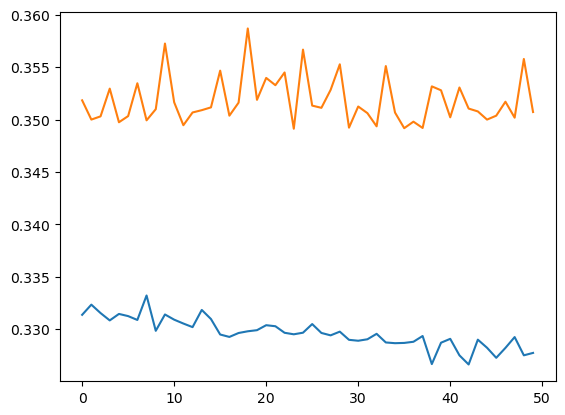

In [673]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


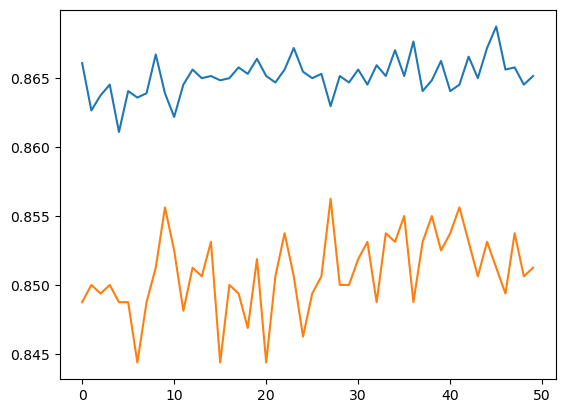

In [675]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
